09-01

Neural Nets으로 XOR 문제를 어떻게 풀었는지 설명해줄께

1개의 유닛으론 XOR을 못푼다는게 수학적으로 증명이 됐었지

그런데 2~3개의 유닛이 쓰인다면 어떻게 될까?

일단 풀 순 있다.


그런데 이런 의문도 있었음. 만약 풀수 있다고 해도 그 안쪽의 레이어들을 어떻게 학습시키냐 하는게 또 다른 의문 이었음.


이번 강의에선 XOR을 푸는 방법에 대해 얘기해봄. 

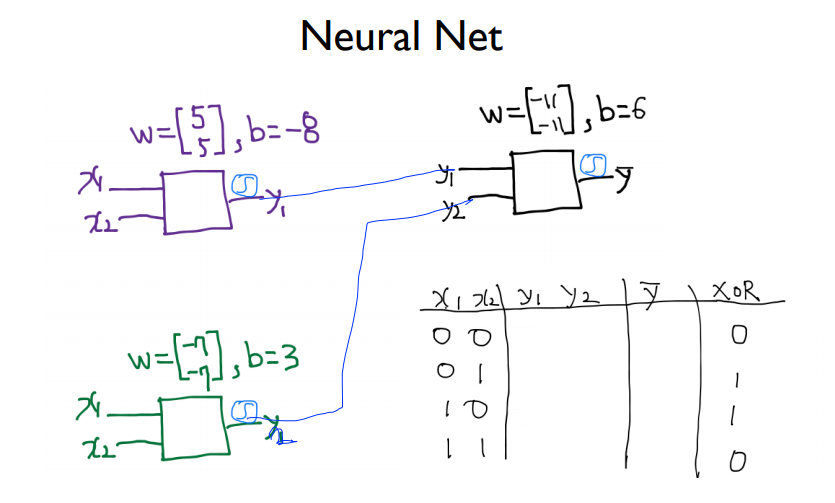

이걸 3개의 유닛으로 풀어봄. 

각 유닛은 x1,x2를 받고 내부는 x1w1+x2w2+b로 이루어짐. 그리고 끝에 Sigmoid를 거쳐 1,0으로 나옴.

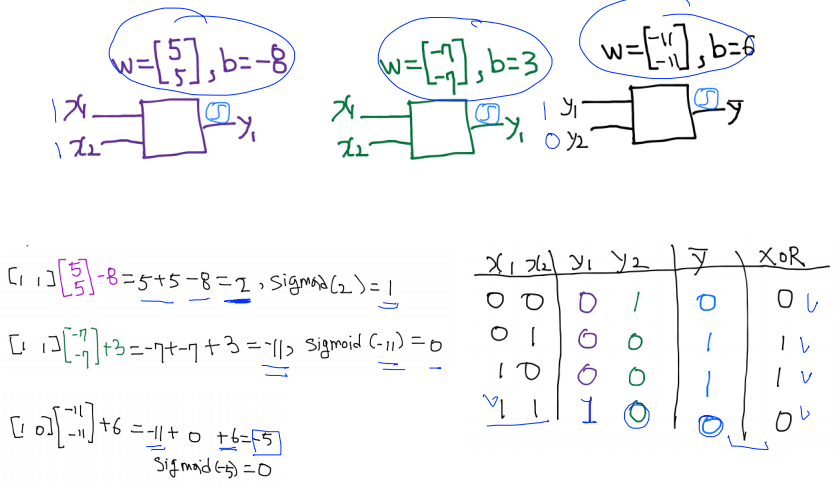

일단 결론은 슬라이드에 있는 것 처럼 w, b를 잘 설정하면 3개의 유닛으로 XOR 을 구현할 수 있다. 

굳이... 내가 직접 안해봐도 되겠지

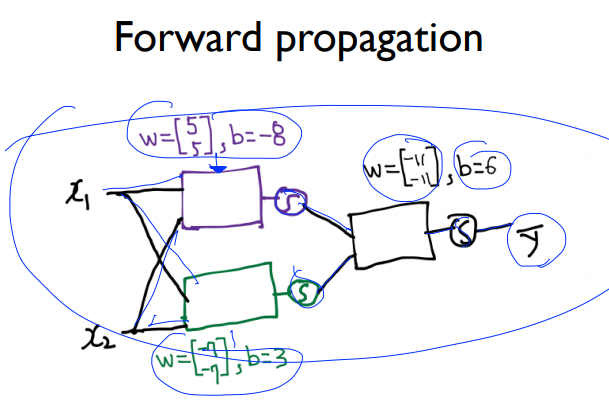

이 3개의 유닛을 위와 같이 그려볼 수 있다. 

이 w, b 쌍은 엄청 많겠지

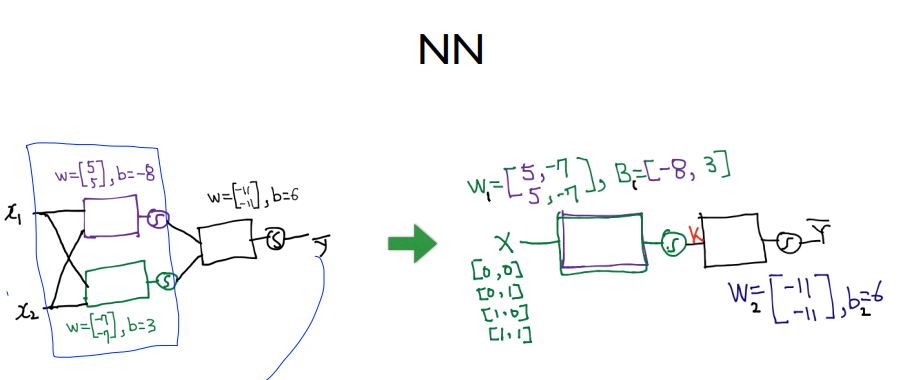

그런데 우리 저번 강의들 중에서 위 그림처럼 두개의 네트워크를 행렬을 이용해 하나로 표현하는 방법을 배웠지.

그래서 행렬로 묶어주면 위의 오른쪽 그림과 같이 깔끔하게 나타낼 수 있음. 

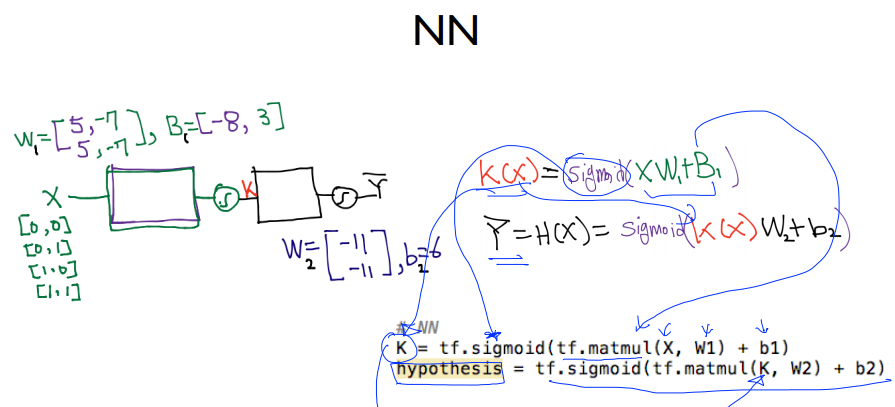

이걸 수식관계로 짜보면 위와 같음. 그리고 아래쪽에보면 코드는 저런식으로 더 쉽게 표현 가능. 


그럼 다시 처음의 질문들로 가보자. 일단 3개 유닛으로 XOR을 구현을 할 순 있었는데

저걸 구하기 위해서 학습을 어떻게 시킬 것이냐!

bonus

09-02 들어가기 전에 미분 특별 강의 해주심

킹치만.. 다 아는 내용인걸..

중첩된 함수 미분하는 것만 다시 좀 떠올리자. 

09-02

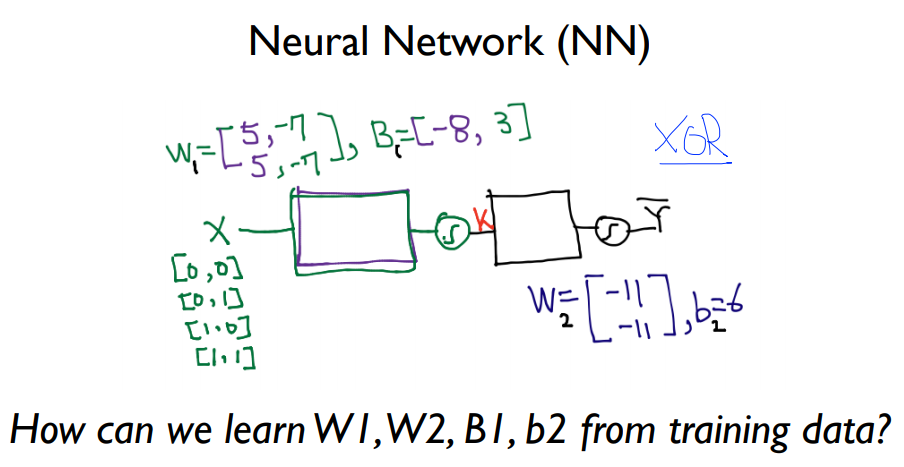

중첩된 뒤쪽의 w, b를 어떻게 학습 시킬까

안쪽의 x1의 최종 y에 대한 영향을 알아야 w를 조정하는데 계산량이 너무 많다. 수학적으로.

수학적으론 가능하지. 중첩 함수를 미분하면 되니까.

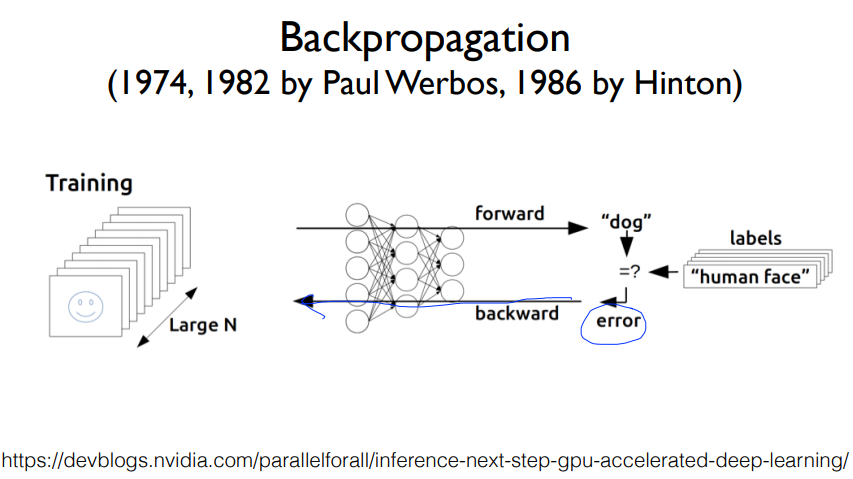

이걸 해결할 방법이 Backpropagation 기법임.

예를들어 설명해줄게.

g = wx
f = wx+b = g+b

일때 이 식을 그래프로 옮기면 다음과 같음.

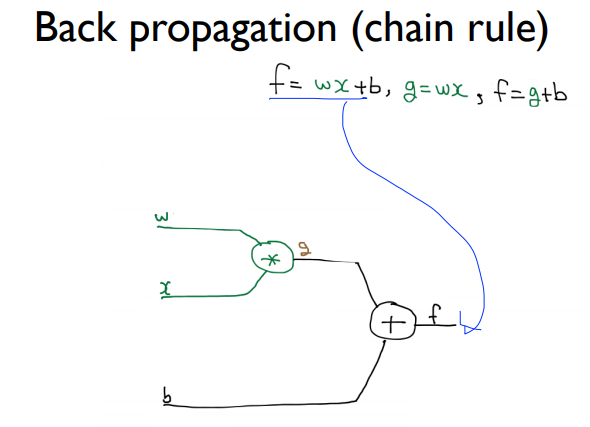

이 그래프에서 우리가 하고 싶은건 각각의 요소들이 최종 값에 미치는 영향력을 따지는 것임.


중첩 함수를 미분할 땐 chain rule에 따라 바깥거 부터 미분 하고 ... 이거 알지

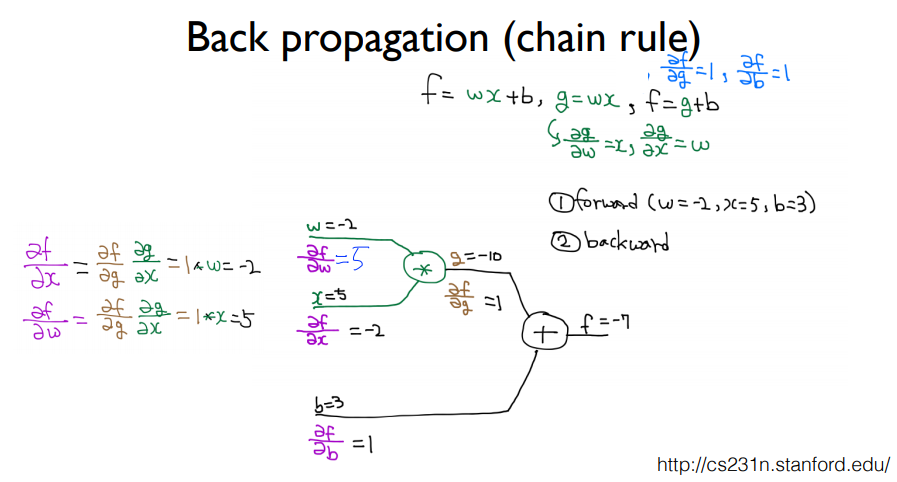

2가지 스텝으로 나눠 진행함.

1. forward : 그래프에 값을 넣어가며 최종 값들을 완성함

2. backward : 미분 때리면서 뒤로 보냄. 

이건 손으로 직접 풀어봐도 좋을 거 같다. 


아 Back Propagation은 그냥 Chain rule로 미분하는거 그 자체였네. 별거 아니네. 

이건 슬라이드 보면서 손으로 한 번 따라해보는게 효과적이겠다. 따로 필기할 게 없네. 



지금까지 슬라이드는 그래도 간단한 구조였는데 만약 많이 중첩되어 있다면 어떻게 할까?

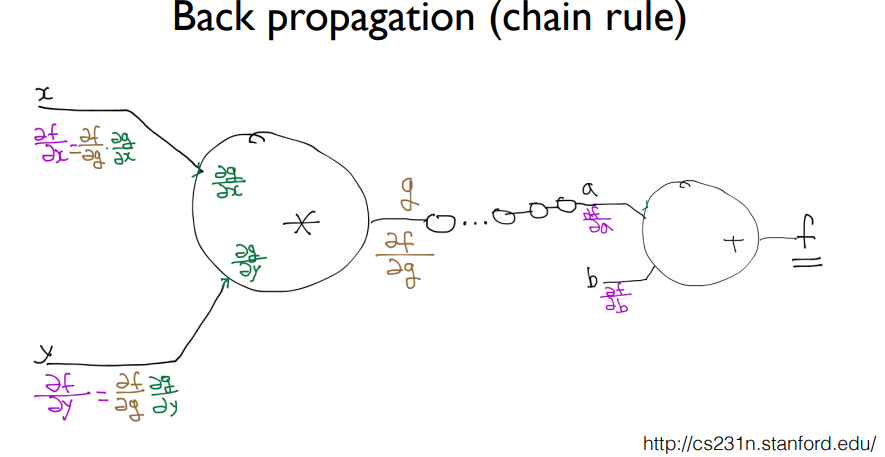

그냥 차례차례 하면 됨 ㅋㅋ


결국 Back propagation의 핵심은 하나네. Chain rule을 써서 안쪽의 미분값을 하나씩 구해나가는것.

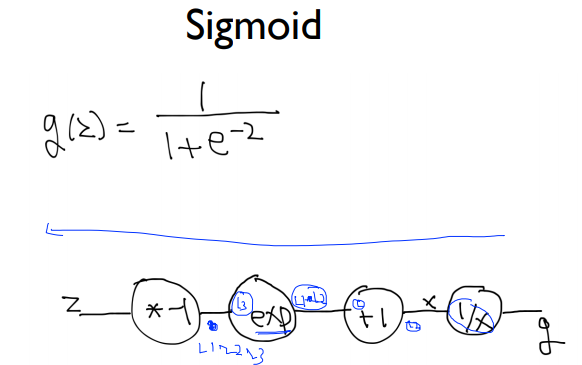

Sigmoid는 어떻게 미분할까? 

위처럼 그래프를 그려보면 쉬워진다. 단순하게 만들어서. 

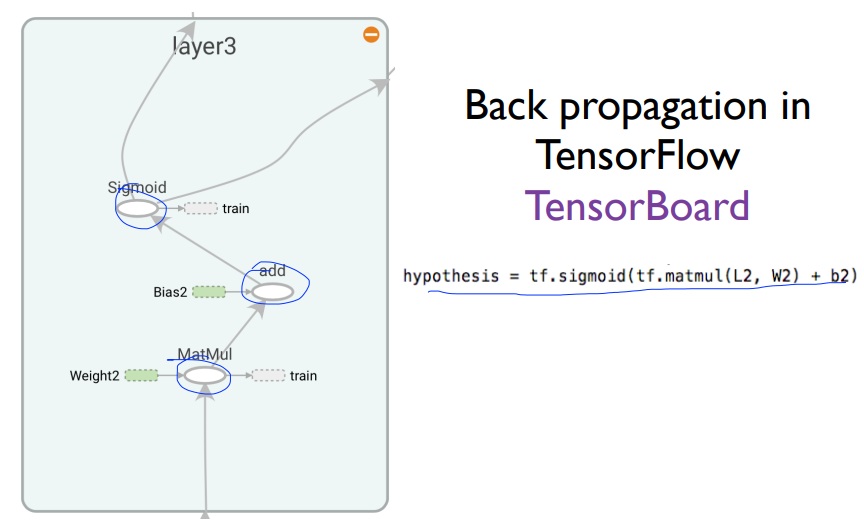

그런데 이걸 텐서플로우를 사용한다면... 훨신쉽지. 그래프만 잘 만들어 놓으면 텐서플로가 알아서 해주니까. 

TensorBoard에서 그래프 만든거 볼 수 있는데 이번 lab에서 알려드림. 

In [17]:
# lab09-1

# 이번 시간은 NN을 이용해서 XOR문제를 풀어볼거다.
# XOR이 뭔지 다시 한 번 짚고 가자.

import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_data = np.array([[0] , [1] ,[1], [0]], dtype=np.float32)

# 텐서플로우를 사용하면 강의 초반에 했던 logistic regression만 써보자 1개의 유닛만 사용하는 거지.

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_normal([2,1]), name = 'weight') # 2개 받아서 1개 리턴
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# 다만 결과 값을 정수로 캐스팅 하는걸 잊지 말자.
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step%100 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis : ",h , "\nCorrect: ", c, "\nAccuracy : ", a)
    
# 근데 밑에 보면 알겠지만 정확도 0.5 밖에 안됨. 왜 안될까

# 이유는 그 민스키가 수학적으로 증명 했다고 했지 1개로는 안된다고


0 1.0595317 [[ 1.0771182]
 [-2.096504 ]]
100 0.74665433 [[ 0.9562225]
 [-0.9198696]]
200 0.70953524 [[ 0.53920466]
 [-0.4891367 ]]
300 0.69794214 [[ 0.29406795]
 [-0.25962868]]
400 0.69452834 [[ 0.15987429]
 [-0.13659823]]
500 0.6935436 [[ 0.08709936]
 [-0.07138459]]
600 0.6932611 [[ 0.0476439]
 [-0.0370362]]
700 0.6931801 [[ 0.0261998 ]
 [-0.01903983]]
800 0.69315666 [[ 0.01450035]
 [-0.0096676 ]]
900 0.69315 [[ 0.00808641]
 [-0.00482448]]
1000 0.693148 [[ 0.00454943]
 [-0.00234774]]
1100 0.6931475 [[ 0.00258531]
 [-0.00109924]]
1200 0.6931472 [[ 0.00148571]
 [-0.00048263]]
1300 0.6931472 [[ 0.00086429]
 [-0.00018723]]
1400 0.6931472 [[ 5.0935539e-04]
 [-5.2366177e-05]]
1500 0.6931471 [[3.0423785e-04]
 [4.1733115e-06]]
1600 0.6931472 [[1.8422102e-04]
 [2.3936725e-05]]
1700 0.6931472 [[1.1305012e-04]
 [2.7432541e-05]]
1800 0.6931472 [[7.0265902e-05]
 [2.4544694e-05]]
1900 0.6931472 [[4.4197801e-05]
 [1.9786741e-05]]
2000 0.6931471 [[2.8101567e-05]
 [1.5072028e-05]]
2100 0.69314724 [[1.

In [19]:
# 그럼 위 코드를 가져와서 NN을 한 층 더 쌓아보자. 아래의 네트워크를 만드는 거임.

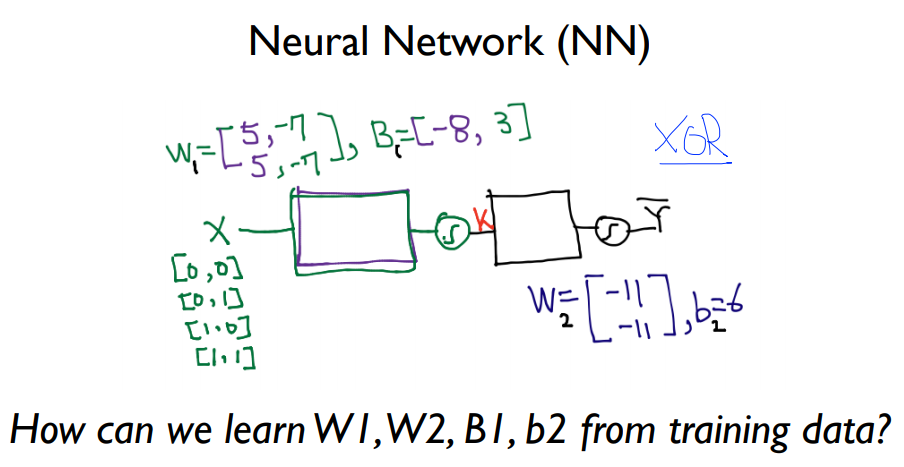

In [20]:
# 이거 할때 중요한건 shape을 잘 써줘야됨. 행렬간의 관계를 생각해보면서 shape을 잘 맞추자.
# 중간 값은 몇개가 나와도 상관 없음.

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_data = np.array([[0] , [1] ,[1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

########################### 여기
########################### 여기
W1 = tf.Variable(tf.random_normal([2,2]), name = 'weight1') # 2개 받아서 2개 리턴
b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1)+b1)

W2 = tf.Variable(tf.random_normal([2,1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
########################### 여기
########################### 여기


cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# 다만 결과 값을 정수로 캐스팅 하는걸 잊지 말자.
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step%100 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis : ",h , "\nCorrect: ", c, "\nAccuracy : ", a)
    
# 이번에 결과를 보자 매우 잘 맞는다.

#Hypothesis :  [[0.03903186]
# [0.9598963 ]
# [0.95584387]
# [0.03273592]] 

# 이걸 돌려보면 아주 잘됨


0 1.2190287 [[-1.0242689]
 [ 1.6404693]]
100 0.6954179 [[-1.0242689]
 [ 1.6404693]]
200 0.69494236 [[-1.0242689]
 [ 1.6404693]]
300 0.6945814 [[-1.0242689]
 [ 1.6404693]]
400 0.694299 [[-1.0242689]
 [ 1.6404693]]
500 0.6940753 [[-1.0242689]
 [ 1.6404693]]
600 0.6938958 [[-1.0242689]
 [ 1.6404693]]
700 0.69374996 [[-1.0242689]
 [ 1.6404693]]
800 0.6936303 [[-1.0242689]
 [ 1.6404693]]
900 0.69353074 [[-1.0242689]
 [ 1.6404693]]
1000 0.69344705 [[-1.0242689]
 [ 1.6404693]]
1100 0.69337577 [[-1.0242689]
 [ 1.6404693]]
1200 0.6933141 [[-1.0242689]
 [ 1.6404693]]
1300 0.6932601 [[-1.0242689]
 [ 1.6404693]]
1400 0.69321173 [[-1.0242689]
 [ 1.6404693]]
1500 0.6931677 [[-1.0242689]
 [ 1.6404693]]
1600 0.69312686 [[-1.0242689]
 [ 1.6404693]]
1700 0.69308794 [[-1.0242689]
 [ 1.6404693]]
1800 0.6930501 [[-1.0242689]
 [ 1.6404693]]
1900 0.69301236 [[-1.0242689]
 [ 1.6404693]]
2000 0.69297385 [[-1.0242689]
 [ 1.6404693]]
2100 0.69293374 [[-1.0242689]
 [ 1.6404693]]
2200 0.69289106 [[-1.0242689]
 [ 1

In [21]:
# 이번엔 실험적으로 중간 레이어를 wide 하게, deep 하게 만들어 볼거임. 아래 사진과 같이

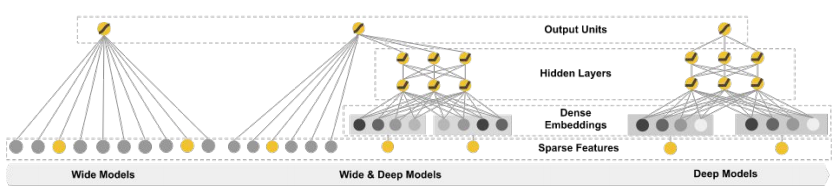

In [22]:
# wide 하게

# 이거 할때 중요한건 shape을 잘 써줘야됨. 행렬간의 관계를 생각해보면서 shape을 잘 맞추자.
# 중간 값은 몇개가 나와도 상관 없음.

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_data = np.array([[0] , [1] ,[1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

########################### 여기
########################### 여기
W1 = tf.Variable(tf.random_normal([2,10]), name = 'weight1') # 2개 받아서 2개 리턴
b1 = tf.Variable(tf.random_normal([10]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1)+b1)

W2 = tf.Variable(tf.random_normal([10,1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
########################### 여기
########################### 여기


cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# 다만 결과 값을 정수로 캐스팅 하는걸 잊지 말자.
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step%100 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis : ",h , "\nCorrect: ", c, "\nAccuracy : ", a)
    
# 이번에 결과를 보자 매우 잘 맞는다.

#Hypothesis :  [[0.03903186]
# [0.9598963 ]
# [0.95584387]
# [0.03273592]] 

# 중간 출력물을 2개가 아니라 10개로 바꿔봄
# 이걸 돌려보면 아주 잘됨
# 유닛으로 보면 중간 2개, 마지막 1개로 3개의 유닛을 썼던걸
# 중간 10개, 마지막 1개로 11개의 유닛을 쓴거지

#Hypothesis :  [[0.00519693]
# [0.99333704]
# [0.99120283]
# [0.00970946]] 

# 결과를 보면 그냥 유닛 3개로 한 것 보다 가설이 더 잘맞는걸 볼 수 있음.

0 0.7070467 [[-0.7447953 ]
 [-0.25995293]]
100 0.6898204 [[-0.7447953 ]
 [-0.25995293]]
200 0.67863643 [[-0.7447953 ]
 [-0.25995293]]
300 0.6691298 [[-0.7447953 ]
 [-0.25995293]]
400 0.65943503 [[-0.7447953 ]
 [-0.25995293]]
500 0.64842653 [[-0.7447953 ]
 [-0.25995293]]
600 0.6351892 [[-0.7447953 ]
 [-0.25995293]]
700 0.618889 [[-0.7447953 ]
 [-0.25995293]]
800 0.5988493 [[-0.7447953 ]
 [-0.25995293]]
900 0.5747281 [[-0.7447953 ]
 [-0.25995293]]
1000 0.54662037 [[-0.7447953 ]
 [-0.25995293]]
1100 0.5149664 [[-0.7447953 ]
 [-0.25995293]]
1200 0.48041284 [[-0.7447953 ]
 [-0.25995293]]
1300 0.4437748 [[-0.7447953 ]
 [-0.25995293]]
1400 0.4060372 [[-0.7447953 ]
 [-0.25995293]]
1500 0.36828965 [[-0.7447953 ]
 [-0.25995293]]
1600 0.33160028 [[-0.7447953 ]
 [-0.25995293]]
1700 0.29688245 [[-0.7447953 ]
 [-0.25995293]]
1800 0.26480103 [[-0.7447953 ]
 [-0.25995293]]
1900 0.2357411 [[-0.7447953 ]
 [-0.25995293]]
2000 0.20982978 [[-0.7447953 ]
 [-0.25995293]]
2100 0.18699446 [[-0.7447953 ]
 [-0.2

In [23]:
# 이번엔 한번 wide + deep 하게 만들어보자
x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_data = np.array([[0] , [1] ,[1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

########################### 여기
########################### 여기
W1 = tf.Variable(tf.random_normal([2,10]), name = 'weight1') # 2개 받아서 2개 리턴
b1 = tf.Variable(tf.random_normal([10]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1)+b1)

W2 = tf.Variable(tf.random_normal([10,10]), name = 'weight1') # 2개 받아서 2개 리턴
b2 = tf.Variable(tf.random_normal([10]), name = 'bias1')
layer2 = tf.sigmoid(tf.matmul(layer1, W2)+b2)

W3 = tf.Variable(tf.random_normal([10,10]), name = 'weight1') # 2개 받아서 2개 리턴
b3 = tf.Variable(tf.random_normal([10]), name = 'bias1')
layer3 = tf.sigmoid(tf.matmul(layer2, W3)+b3)

W4 = tf.Variable(tf.random_normal([10,1]), name='weight2')
b4 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)
########################### 여기
########################### 여기


cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# 다만 결과 값을 정수로 캐스팅 하는걸 잊지 말자.
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step%100 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis : ",h , "\nCorrect: ", c, "\nAccuracy : ", a)
    
##
#Hypothesis :  [[0.00155659]
# [0.99817467]
# [0.9978542 ]
# [0.00236769]] 

# 이번엔 그냥 wide 하게만 했을 때 보다 가설이 더더 잘맞는걸 볼 수 있음.

0 0.7093009 [[1.2810578 ]
 [0.15091062]]
100 0.694856 [[1.2810578 ]
 [0.15091062]]
200 0.69401354 [[1.2810578 ]
 [0.15091062]]
300 0.6931784 [[1.2810578 ]
 [0.15091062]]
400 0.69232833 [[1.2810578 ]
 [0.15091062]]
500 0.6914402 [[1.2810578 ]
 [0.15091062]]
600 0.6904893 [[1.2810578 ]
 [0.15091062]]
700 0.68944633 [[1.2810578 ]
 [0.15091062]]
800 0.6882759 [[1.2810578 ]
 [0.15091062]]
900 0.68693304 [[1.2810578 ]
 [0.15091062]]
1000 0.6853597 [[1.2810578 ]
 [0.15091062]]
1100 0.6834792 [[1.2810578 ]
 [0.15091062]]
1200 0.6811898 [[1.2810578 ]
 [0.15091062]]
1300 0.67835516 [[1.2810578 ]
 [0.15091062]]
1400 0.67479473 [[1.2810578 ]
 [0.15091062]]
1500 0.6702719 [[1.2810578 ]
 [0.15091062]]
1600 0.6644858 [[1.2810578 ]
 [0.15091062]]
1700 0.65707314 [[1.2810578 ]
 [0.15091062]]
1800 0.6476379 [[1.2810578 ]
 [0.15091062]]
1900 0.6358269 [[1.2810578 ]
 [0.15091062]]
2000 0.6214583 [[1.2810578 ]
 [0.15091062]]
2100 0.6046395 [[1.2810578 ]
 [0.15091062]]
2200 0.5857148 [[1.2810578 ]
 [0.15091

In [10]:
# 숙제로 MNIST 를 한번 deep 하게, wide 하게 만들어보자.

In [26]:
# lab09-2

# 이제 개꿀템 TensorBoard를 알아보자. 텐서보드는 그래프를 그려주는 도구임. 알아두면 굉장히 유용하게 사용 가능

# 지금까진 그냥 출력해서 숫자로만 봤다면 그래프로 보자는 거지.

# 텐서보드를 그리는데는 5개 스텝만 밟으면 됨


# 1. 어떤 텐서를 어떤 방식으로 로깅할 것인지 정해줌

# 2. 1에서 정한 것들을 merge해줌

# 3.세션에서 로깅 결과를 어디에 저장할 것인지 기록하고, 그래프도 그려달라고 등록해둠.

# 4. 어쨌든 그 그래프도 탠서이므로 그걸 실행 시켜줘야됨.-> 로그 파일 생성됨

# 5. 텐서보드를 실행 시킴.


# 어떤 텐서를 어떻게 로깅할까?

# scalar 값을 갖는것도 있고 histogram으로 그릴수도 있음.


# 텐서에서 제공하는 name_scope를 써주면 텐서 보드에서 볼때 더 쉽게 볼 수 있음.
# 레이어 별로 그룹지어 주는 거임. 보기 쉽게


# 텐서보드는 브라우저에서 볼 수 있음.

# 근데 로컬이 아니라 리모트에서 텐서 돌리는 거면 텐서보드 불러온느 방법이 조금은 복잡함. ssh를 써야됨. 
# 슬라이드에 있는걸 그냥 기계적으로 써도 됨. 

# --> ssh -L local_port:127.0.0.1:remote_port username@server.com


In [29]:
x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_data = np.array([[0] , [1] ,[1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)


W1 = tf.Variable(tf.random_normal([2,10]), name = 'weight1') # 2개 받아서 2개 리턴
b1 = tf.Variable(tf.random_normal([10]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1)+b1)

W2 = tf.Variable(tf.random_normal([10,1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# 1. 어떤 텐서를 어떤 방식으로 로깅할 것인지 정해줌
# 1. 어떤 텐서를 어떤 방식으로 로깅할 것인지 정해줌
W1_hist = tf.summary.histogram("weight1", W1)
W2_hist = tf.summary.histogram("weight2", W2)
cost_summ = tf.summary.scalar("cost", cost)

# 2. 1에서 정한 것들을 merge해줌
# 2. 1에서 정한 것들을 merge해줌
summary = tf.summary.merge_all()

# 3.세션에서 로깅 결과를 어디에 저장할 것인지 기록하고, 그래프도 그려달라고 등록해둠.
# 3.세션에서 로깅 결과를 어디에 저장할 것인지 기록하고, 그래프도 그려달라고 등록해둠.
writer = tf.summary.FileWriter('./logs')
writer.add_graph(sess.graph)

# 다만 결과 값을 정수로 캐스팅 하는걸 잊지 말자.
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step%100 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis : ",h , "\nCorrect: ", c, "\nAccuracy : ", a)
    
    # 4. 어쨌든 그 그래프도 탠서이므로 그걸 실행 시켜줘야됨.-> 로그 파일 생성됨
    # 4. 어쨌든 그 그래프도 탠서이므로 그걸 실행 시켜줘야됨.-> 로그 파일 생성됨
    s = sess.run(summary, feed_dict={X:x_data, Y:y_data})
    writer.add_summary(s, global_step = global_step)

0 2.1946774 [[ 1.0052233 ]
 [-0.16876239]]
100 0.6911697 [[ 1.0052233 ]
 [-0.16876239]]
200 0.66574264 [[ 1.0052233 ]
 [-0.16876239]]
300 0.6423936 [[ 1.0052233 ]
 [-0.16876239]]
400 0.6168387 [[ 1.0052233 ]
 [-0.16876239]]
500 0.5866053 [[ 1.0052233 ]
 [-0.16876239]]
600 0.550333 [[ 1.0052233 ]
 [-0.16876239]]
700 0.50763416 [[ 1.0052233 ]
 [-0.16876239]]
800 0.45922872 [[ 1.0052233 ]
 [-0.16876239]]
900 0.40707994 [[ 1.0052233 ]
 [-0.16876239]]
1000 0.3541593 [[ 1.0052233 ]
 [-0.16876239]]
1100 0.3036799 [[ 1.0052233 ]
 [-0.16876239]]
1200 0.258161 [[ 1.0052233 ]
 [-0.16876239]]
1300 0.21890542 [[ 1.0052233 ]
 [-0.16876239]]
1400 0.18607701 [[ 1.0052233 ]
 [-0.16876239]]
1500 0.15911238 [[ 1.0052233 ]
 [-0.16876239]]
1600 0.13713768 [[ 1.0052233 ]
 [-0.16876239]]
1700 0.11924285 [[ 1.0052233 ]
 [-0.16876239]]
1800 0.104614176 [[ 1.0052233 ]
 [-0.16876239]]
1900 0.09257704 [[ 1.0052233 ]
 [-0.16876239]]
2000 0.08259289 [[ 1.0052233 ]
 [-0.16876239]]
2100 0.07424028 [[ 1.0052233 ]
 [-0

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_23' with dtype float
	 [[node Placeholder_23 (defined at C:\Users\Kiseung\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]

Original stack trace for 'Placeholder_23':
  File "C:\Users\Kiseung\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Kiseung\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Kiseung\Anaconda3\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "C:\Users\Kiseung\Anaconda3\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "C:\Users\Kiseung\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-2508f504c4a9>", line 5, in <module>
    Y = tf.placeholder(tf.float32)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 2630, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 6670, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 793, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3360, in create_op
    attrs, op_def, compute_device)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3429, in _create_op_internal
    op_def=op_def)
  File "C:\Users\Kiseung\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1751, in __init__
    self._traceback = tf_stack.extract_stack()


결과는 파이썬 콘솔에서 

tensorboard --logdir=./logs

이런 식으로 치면 됨. 그러면

http://localhost:6006/ 에서 확인 할 수 있음

In [25]:
# 그런데 같은 모델을 옵션을 다르게 해서 돌리고 비교하고 싶을 때가 있을 거임. 

# 그럴때 쓸 수 있는 방법도 있으니까 참곶\하자. 같은 디렉터리에서 파일만 다르게 쓰면 됨. 
# 불러올땐 그 같은 루트 디렉터리를 실행 시키면 됨.

In [ ]:
# 이번 숙제는 MNIST를 deep, wide 하게 하되 보드를 그려보자.